<a href="https://colab.research.google.com/github/JackieGauthier/Flight-Price-Prediction/blob/main/DW_and_MLproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




---



---


**AIR FARE PRICE PREDICTION**

---



---






**MACHINE LEARNING PROJECT ON PREDICTION OF FLIGHT PRICE AND PRICE_RANGE**

---



Airfare prices tend to fluctuate in price a decent amount based on a
range of factors.


Some of these factors include the time of day, day of the week origin, destination, airline,population and weather.

For this project, we are going to analyze flight data to see how some of these factors influence the price of a plane ticket in India.

We performed regression models to predict the prices of flights and we performed classification models to predict the price range of flights.


In [ ]:
# Load the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**LOAD ,MERGE AND READ FLIGHTS DATASET**

In [ ]:
# Read the data of flights
business = pd.read_csv('/content/drive/MyDrive/Business_date2.csv')
economy = pd.read_csv('/content/drive/MyDrive/economy_date1.csv')
# Concating  the data
input_data11= pd.concat([business, economy])


#input_data11.to_csv('/content/drive/MyDrive/input_data11.csv', index=False)

In [ ]:
# Randomly generating 5 samples from dataset
input_data11.sample(n=5)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,class,price
5359,2022-03-10,Air India,AI,805,20:00:00,Delhi,02h 10m,non-stop,22:10:00,Mumbai,Economy,2476
124650,2022-03-14,GO FIRST,G8,295,06:15:00,Kolkata,12h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,18:15:00,Delhi,Economy,6294
25324,2022-03-13,Air India,AI,473,18:40:00,Delhi,17h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,12:30:00,Kolkata,Economy,3971
60628,2022-03-31,Air India,AI,402,10:25:00,Kolkata,11h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,21:35:00,Mumbai,Business,50271
85360,2022-02-19,Air India,AI,503,17:50:00,Bangalore,02h 45m,non-stop,20:35:00,Delhi,Economy,7489


In [ ]:
input_data11.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300261 entries, 0 to 206773
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        300261 non-null  object
 1   airline     300261 non-null  object
 2   ch_code     300261 non-null  object
 3   num_code    300261 non-null  int64 
 4   dep_time    300261 non-null  object
 5   from        300261 non-null  object
 6   time_taken  300261 non-null  object
 7   stop        300261 non-null  object
 8   arr_time    300261 non-null  object
 9   to          300261 non-null  object
 10  class       300261 non-null  object
 11  price       300261 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 29.8+ MB


In [ ]:
input_data11.dtypes

date          object
airline       object
ch_code       object
num_code       int64
dep_time      object
from          object
time_taken    object
stop          object
arr_time      object
to            object
class         object
price          int64
dtype: object

**LOAD AND READ POPULATION DATASET**

In [ ]:
# Read population dataset in Excel file
df = pd.read_excel('/content/drive/MyDrive/sample_all_pop2.xlsx')

# Remove rows with '-' in the 'District' column
df_cleaned = df[df['District'] != '-']

# Display the first few rows of the cleaned DataFrame
print(df_cleaned.head())

# Convert to CSV
#csv_filename = '/content/drive/My Drive/path_to_your_csv_file21.csv'
#df_cleaned.to_csv(csv_filename, index=False)

# Download CSV file
#from google.colab import files
#files.download(csv_filename)

             State    District      City Population Area (in km^2)  Latitude  \
36       Telangana    Adilabad         -     708952        4185.97     19.67   
37  Andhra Pradesh    Adilabad  Adilabad     117167           35.5     19.67   
38  Madhya Pradesh  Agar Malwa         -          0           2785     23.70   
39   Uttar Pradesh        Agra         -    4380793           4027     27.08   
40   Uttar Pradesh        Agra      Agra    1585704            543     27.18   

    Longitude  
36      78.52  
37      78.53  
38      76.00  
39      77.97  
40      78.01  


In [ ]:
## Read population dataset csv file
df = pd.read_csv('/content/drive/MyDrive/path_to_your_csv_file21.csv')
df.head()

,State,District,City,Population,Area (in km^2),Latitude,Longitude
0,Telangana,Adilabad,-,708952,4185.97,19.67,78.52
1,Andhra Pradesh,Adilabad,Adilabad,117167,35.5,19.67,78.53
2,Madhya Pradesh,Agar Malwa,-,0,2785,23.70,76.00
3,Uttar Pradesh,Agra,-,4380793,4027,27.08,77.97
4,Uttar Pradesh,Agra,Agra,1585704,543,27.18,78.01


In [ ]:
#datatypes in dataset
df.dtypes

State              object
District           object
City               object
Population         object
Area (in km^2)     object
Latitude          float64
Longitude         float64
dtype: object

**LOAD AND READ WEATHER DATASET**

In [ ]:
# Read  Weather Excel file
weather1 = pd.read_excel('/content/drive/MyDrive/Weather_Cities.xlsx')
# Convert to CSV
#csv_filename1 = '/content/drive/My Drive/weather1.csv'
#weather1.to_csv(csv_filename1, index=False)
# Display the first few rows of the cleaned DataFrame
print(weather1.head())

        Name   datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
0  Hyderabad 2022-02-11     80.8     64.8  73.4          81.8          64.8   
1  Hyderabad 2022-02-12     82.9     61.1  72.5          81.3          61.1   
2  Hyderabad 2022-02-13     83.6     56.4  72.3          81.8          56.4   
3  Hyderabad 2022-02-14     85.3     59.4  72.8          83.5          59.4   
4  Hyderabad 2022-02-15     85.2     64.4  73.9          84.0          64.4   

   feelslike   dew  humidity  ...  solarenergy  uvindex  severerisk  \
0       73.4  61.2      67.2  ...         20.9        9          10   
1       72.3  52.2      50.8  ...         21.8        9          10   
2       72.0  50.6      48.4  ...         22.4        9          10   
3       72.6  57.4      61.1  ...         22.2        9          10   
4       73.9  61.6      68.1  ...         21.3        9          10   

               sunrise               sunset  moonphase        conditions  \
0  2022-02-11T06:44:48

In [ ]:
 weather1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Name              294 non-null    object        
 1   datetime          294 non-null    datetime64[ns]
 2   tempmax           294 non-null    float64       
 3   tempmin           294 non-null    float64       
 4   temp              294 non-null    float64       
 5   feelslikemax      294 non-null    float64       
 6   feelslikemin      294 non-null    float64       
 7   feelslike         294 non-null    float64       
 8   dew               294 non-null    float64       
 9   humidity          294 non-null    float64       
 10  precip            294 non-null    float64       
 11  precipprob        294 non-null    int64         
 12  precipcover       294 non-null    float64       
 13  preciptype        26 non-null     object        
 14  snow              294 non-

In [ ]:
weather1.dtypes

Name                        object
datetime            datetime64[ns]
tempmax                    float64
tempmin                    float64
temp                       float64
feelslikemax               float64
feelslikemin               float64
feelslike                  float64
dew                        float64
humidity                   float64
precip                     float64
precipprob                   int64
precipcover                float64
preciptype                  object
snow                         int64
snowdepth                  float64
windgust                   float64
windspeed                  float64
winddir                    float64
sealevelpressure           float64
cloudcover                 float64
visibility                 float64
solarradiation             float64
solarenergy                float64
uvindex                      int64
severerisk                   int64
sunrise                     object
sunset                      object
moonphase           

**Merging Flights and Population datasets**

In [ ]:
# Read Dataset1 and Dataset2
dataset1 = pd.read_csv('/content/drive/MyDrive/input_data11.csv')
dataset2 = pd.read_csv('/content/drive/MyDrive/path_to_your_csv_file21.csv')

In [ ]:
# Merge datasets based on common columns 'from' and 'to'
merged_data11 = pd.merge(dataset1, dataset2, how='left', left_on=['from'], right_on=['District'])
merged_data11 = pd.merge(merged_data11, dataset2, how='left', left_on=['to'], right_on=['District'])

# Select required columns
output_columns = ['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from', 'time_taken', 'stop',
                  'arr_time', 'to','class', 'price', 'State_x', 'Population_x', 'State_y','Population_y', 'Area (in km^2)_x',
                  'Area (in km^2)_y','Latitude_x','Longitude_x','Latitude_y','Longitude_y']

merged_data11 = merged_data11[output_columns]

# Rename columns
merged_data11.rename(columns={'State_x': 'State','State': 'State_y', 'Population_x': 'Population_from', 'Population_y': 'Population_to',
                            'Area (in km^2)_x': 'Area_from', 'Area (in km^2)_y': 'Area_to','Latitude_from':'Latitude_x','Longitude_from':'Longitude_x','Latitude_to':'Latitude_y','Longitude_to':'Longitude_y'}, inplace=True)

# Display the resulting DataFrame
print(merged_data11)

# Save the resulting DataFrame to a CSV file
#merged_data11.to_csv('/content/drive/MyDrive/merged_data11.csv', index=False)

<ipython-input-13-193c69c11175>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data11.rename(columns={'State_x': 'State','State': 'State_y', 'Population_x': 'Population_from', 'Population_y': 'Population_to',


              date    airline ch_code  num_code  dep_time     from time_taken  \
0       2022-02-11  Air India      AI       868  18:00:00    Delhi    02h 00m   
1       2022-02-11  Air India      AI       624  19:00:00    Delhi    02h 15m   
2       2022-02-11  Air India      AI       531  20:00:00    Delhi    24h 45m   
3       2022-02-11  Air India      AI       839  21:25:00    Delhi    26h 30m   
4       2022-02-11  Air India      AI       544  17:15:00    Delhi    06h 40m   
...            ...        ...     ...       ...       ...      ...        ...   
300256  2022-03-31    Vistara      UK       832  07:05:00  Chennai    13h 50m   
300257  2022-03-31    Vistara      UK       832  07:05:00  Chennai    13h 50m   
300258  2022-03-31    Vistara      UK       826  12:30:00  Chennai    20h 35m   
300259  2022-03-31    Vistara      UK       822  09:45:00  Chennai    23h 20m   
300260  2022-03-31    Vistara      UK       824  20:30:00  Chennai    24h 25m   

                           

**Creating a new feature flight  using ch_code and num_code features**

In [ ]:

merged_data11['flight'] = merged_data11['ch_code'] + merged_data11['num_code'].astype(str)
merged_data11.head(5)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,...,Population_from,State_y,Population_to,Area_from,Area_to,Latitude_x,Longitude_x,Latitude_y,Longitude_y,flight
0,2022-02-11,Air India,AI,868,18:00:00,Delhi,02h 00m,non-stop,20:00:00,Mumbai,...,47489407,Maharashtra,84880553,43,69,28.6,77.13,18.97,72.82,AI868
1,2022-02-11,Air India,AI,624,19:00:00,Delhi,02h 15m,non-stop,21:15:00,Mumbai,...,47489407,Maharashtra,84880553,43,69,28.6,77.13,18.97,72.82,AI624
2,2022-02-11,Air India,AI,531,20:00:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45:00,Mumbai,...,47489407,Maharashtra,84880553,43,69,28.6,77.13,18.97,72.82,AI531
3,2022-02-11,Air India,AI,839,21:25:00,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,...,47489407,Maharashtra,84880553,43,69,28.6,77.13,18.97,72.82,AI839
4,2022-02-11,Air India,AI,544,17:15:00,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,...,47489407,Maharashtra,84880553,43,69,28.6,77.13,18.97,72.82,AI544


**create new features for day of the week, month, and year from the 'date' column from dataset**

In [ ]:
# Assuming your dataset is stored in a DataFrame named 'merged_data11'

# Convert 'date' column to datetime type
merged_data11['date'] = pd.to_datetime(merged_data11['date'])

# Extract year, month, and day of the week from 'date' column
merged_data11['year'] = merged_data11['date'].dt.year
merged_data11['month'] = merged_data11['date'].dt.month
merged_data11['day_of_week'] = merged_data11['date'].dt.dayofweek  # Monday=0, Sunday=6

# Map day of the week to its name
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
merged_data11['day_of_week'] = merged_data11['day_of_week'].map(day_map)

# Print the updated DataFrame
print(merged_data11)


             date    airline ch_code  num_code  dep_time     from time_taken  \
0      2022-02-11  Air India      AI       868  18:00:00    Delhi    02h 00m   
1      2022-02-11  Air India      AI       624  19:00:00    Delhi    02h 15m   
2      2022-02-11  Air India      AI       531  20:00:00    Delhi    24h 45m   
3      2022-02-11  Air India      AI       839  21:25:00    Delhi    26h 30m   
4      2022-02-11  Air India      AI       544  17:15:00    Delhi    06h 40m   
...           ...        ...     ...       ...       ...      ...        ...   
300256 2022-03-31    Vistara      UK       832  07:05:00  Chennai    13h 50m   
300257 2022-03-31    Vistara      UK       832  07:05:00  Chennai    13h 50m   
300258 2022-03-31    Vistara      UK       826  12:30:00  Chennai    20h 35m   
300259 2022-03-31    Vistara      UK       822  09:45:00  Chennai    23h 20m   
300260 2022-03-31    Vistara      UK       824  20:30:00  Chennai    24h 25m   

                                       

**create separate columns for arr_hour,arr_min,dep_hour,dep_min from the 'arr_time',dep_time column from dataset**

In [ ]:


# Assuming your dataset is stored in a DataFrame named 'merged_data11'

# Convert 'arr_time' and 'dep_time' columns to datetime type
merged_data11['arr_time'] = pd.to_datetime(merged_data11['arr_time'], errors='coerce')
merged_data11['dep_time'] = pd.to_datetime(merged_data11['dep_time'], errors='coerce')

# Extract arrival hour, arrival minutes, departure hour, and departure minutes from 'arr_time' and 'dep_time' columns
merged_data11['arr_hour'] = merged_data11['arr_time'].dt.hour
merged_data11['arr_minutes'] = merged_data11['arr_time'].dt.minute
merged_data11['dep_hour'] = merged_data11['dep_time'].dt.hour
merged_data11['dep_minutes'] = merged_data11['dep_time'].dt.minute

# Now convert 'arr_time' and 'dep_time' to just time (without date) in string format
merged_data11['arr_time'] = merged_data11['arr_time'].dt.strftime('%H:%M:%S')
merged_data11['dep_time'] = merged_data11['dep_time'].dt.strftime('%H:%M:%S')

# Verify the changes and print the updated DataFrame
print(merged_data11.head(5))


<ipython-input-16-9c0ed9c2b4ed>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data11['arr_time'] = pd.to_datetime(merged_data11['arr_time'], errors='coerce')
<ipython-input-16-9c0ed9c2b4ed>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data11['dep_time'] = pd.to_datetime(merged_data11['dep_time'], errors='coerce')


        date    airline ch_code  num_code  dep_time   from time_taken  \
0 2022-02-11  Air India      AI       868  18:00:00  Delhi    02h 00m   
1 2022-02-11  Air India      AI       624  19:00:00  Delhi    02h 15m   
2 2022-02-11  Air India      AI       531  20:00:00  Delhi    24h 45m   
3 2022-02-11  Air India      AI       839  21:25:00  Delhi    26h 30m   
4 2022-02-11  Air India      AI       544  17:15:00  Delhi    06h 40m   

                                                stop  arr_time      to  ...  \
0                                          non-stop   20:00:00  Mumbai  ...   
1                                          non-stop   21:15:00  Mumbai  ...   
2  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...  20:45:00  Mumbai  ...   
3  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...  23:55:00  Mumbai  ...   
4  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...  23:55:00  Mumbai  ...   

  Latitude_y  Longitude_y flight  year month day_of_week arr_hour arr_minutes  \
0    

In [ ]:
merged_data11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             300261 non-null  datetime64[ns]
 1   airline          300261 non-null  object        
 2   ch_code          300261 non-null  object        
 3   num_code         300261 non-null  int64         
 4   dep_time         300261 non-null  object        
 5   from             300261 non-null  object        
 6   time_taken       300261 non-null  object        
 7   stop             300261 non-null  object        
 8   arr_time         300261 non-null  object        
 9   to               300261 non-null  object        
 10  class            300261 non-null  object        
 11  price            300261 non-null  int64         
 12  State            300261 non-null  object        
 13  Population_from  300261 non-null  object        
 14  State_y          300

In [ ]:
#merged_data11.to_csv('/content/drive/MyDrive/merg.csv', index=False)

In [ ]:
merged_data11.isnull().sum()

date               0
airline            0
ch_code            0
num_code           0
dep_time           0
from               0
time_taken         0
stop               0
arr_time           0
to                 0
class              0
price              0
State              0
Population_from    0
State_y            0
Population_to      0
Area_from          0
Area_to            0
Latitude_x         0
Longitude_x        0
Latitude_y         0
Longitude_y        0
flight             0
year               0
month              0
day_of_week        0
arr_hour           0
arr_minutes        0
dep_hour           0
dep_minutes        0
dtype: int64

**Merging merged_data11(flight,population dataset) to weather dataset**

In [ ]:


# Load datasets
dataset1 = pd.read_csv("/content/drive/MyDrive/merg.csv")
dataset2 = pd.read_csv("/content/drive/MyDrive/weather1.csv")

# Convert 'date' columns to datetime64[ns]
dataset1['date'] = pd.to_datetime(dataset1['date'])
dataset2['datetime'] = pd.to_datetime(dataset2['datetime'])

# Merge datasets on common columns
merged_dataset = pd.merge(dataset1, dataset2, left_on=['date', 'from'], right_on=['datetime', 'Name'])

# Define output columns and further processing as required...

# After merging, check what columns are available
print(merged_dataset.columns)

# Print or save the merged dataset
print(merged_dataset)


Index(['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from',
       'time_taken', 'stop', 'arr_time', 'to', 'class', 'price', 'State',
       'Population_from', 'State_y', 'Population_to', 'Area_from', 'Area_to',
       'Latitude_x', 'Longitude_x', 'Latitude_y', 'Longitude_y', 'flight',
       'year', 'month', 'day_of_week', 'arr_hour', 'arr_minutes', 'dep_hour',
       'dep_minutes', 'Name', 'datetime', 'tempmax', 'tempmin', 'temp',
       'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
       'precip', 'precipprob', 'precipcover', 'preciptype', 'snow',
       'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'severerisk', 'sunrise', 'sunset', 'moonphase', 'conditions',
       'description', 'icon', 'stations'],
      dtype='object')
             date    airline ch_code  num_code  dep_time     from time_taken  \
0      2022-02-11  Air India      AI       868

In [ ]:
# Define the output columns based on the columns available in the DataFrame
output_columns = [
    'date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from', 'time_taken', 'stop',
    'arr_time', 'to', 'class', 'price', 'State', 'Population_from', 'State_y', 'Population_to',
    'Area_from', 'Area_to', 'Latitude_x', 'Longitude_x', 'Latitude_y', 'Longitude_y',
    'icon', 'dew', 'humidity', 'tempmax', 'tempmin', 'temp','year', 'flight',
   'month','day_of_week','arr_hour','arr_minutes'  , 'dep_hour',  'dep_minutes'
]

# Select only the desired output columns from the merged dataset
merged_dataset_selected = merged_dataset[output_columns]

# Print or save the selected columns of the merged dataset
print(merged_dataset_selected.head())  # Display the first few rows of the selected dataset


        date    airline ch_code  num_code  dep_time   from time_taken  \
0 2022-02-11  Air India      AI       868  18:00:00  Delhi    02h 00m   
1 2022-02-11  Air India      AI       624  19:00:00  Delhi    02h 15m   
2 2022-02-11  Air India      AI       531  20:00:00  Delhi    24h 45m   
3 2022-02-11  Air India      AI       839  21:25:00  Delhi    26h 30m   
4 2022-02-11  Air India      AI       544  17:15:00  Delhi    06h 40m   

                                                stop  arr_time      to  ...  \
0                                          non-stop   20:00:00  Mumbai  ...   
1                                          non-stop   21:15:00  Mumbai  ...   
2  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...  20:45:00  Mumbai  ...   
3  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...  23:55:00  Mumbai  ...   
4  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...  23:55:00  Mumbai  ...   

  tempmin  temp  year  flight month  day_of_week  arr_hour  arr_minutes  \
0    48.5  

In [ ]:
merged_dataset_selected.isnull().sum()

date               0
airline            0
ch_code            0
num_code           0
dep_time           0
from               0
time_taken         0
stop               0
arr_time           0
to                 0
class              0
price              0
State              0
Population_from    0
State_y            0
Population_to      0
Area_from          0
Area_to            0
Latitude_x         0
Longitude_x        0
Latitude_y         0
Longitude_y        0
icon               0
dew                0
humidity           0
tempmax            0
tempmin            0
temp               0
year               0
flight             0
month              0
day_of_week        0
arr_hour           0
arr_minutes        0
dep_hour           0
dep_minutes        0
dtype: int64

In [ ]:
#merged_dataset_selected.to_csv('/content/drive/MyDrive/FinalML_dataset.csv', index=False)

**The Final dataset after merging Flights,Population,Weather datasets**

In [ ]:
# Read data
Final_data =  pd.read_csv('/content/drive/MyDrive/FinalML_dataset.csv')

In [ ]:
Final_data.isnull().sum()

date               0
airline            0
ch_code            0
num_code           0
dep_time           0
from               0
time_taken         0
stop               0
arr_time           0
to                 0
class              0
price              0
State              0
Population_from    0
State_y            0
Population_to      0
Area_from          0
Area_to            0
Latitude_x         0
Longitude_x        0
Latitude_y         0
Longitude_y        0
icon               0
dew                0
humidity           0
tempmax            0
tempmin            0
temp               0
year               0
flight             0
month              0
day_of_week        0
arr_hour           0
arr_minutes        0
dep_hour           0
dep_minutes        0
dtype: int64

In [ ]:
Final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 36 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             300261 non-null  object 
 1   airline          300261 non-null  object 
 2   ch_code          300261 non-null  object 
 3   num_code         300261 non-null  int64  
 4   dep_time         300261 non-null  object 
 5   from             300261 non-null  object 
 6   time_taken       300261 non-null  object 
 7   stop             300261 non-null  object 
 8   arr_time         300261 non-null  object 
 9   to               300261 non-null  object 
 10  class            300261 non-null  object 
 11  price            300261 non-null  int64  
 12  State            300261 non-null  object 
 13  Population_from  300261 non-null  int64  
 14  State_y          300261 non-null  object 
 15  Population_to    300261 non-null  int64  
 16  Area_from        300261 non-null  floa

In [ ]:
Final_data['airline'].unique()

array(['Air India', 'Vistara', 'SpiceJet', 'AirAsia', 'GO FIRST',
       'Indigo', 'Trujet', 'StarAir'], dtype=object)

In [ ]:
Final_data.shape

(300261, 36)

In [ ]:
Final_data.dtypes

date                object
airline             object
ch_code             object
num_code             int64
dep_time            object
from                object
time_taken          object
stop                object
arr_time            object
to                  object
class               object
price                int64
State               object
Population_from      int64
State_y             object
Population_to        int64
Area_from          float64
Area_to            float64
Latitude_x         float64
Longitude_x        float64
Latitude_y         float64
Longitude_y        float64
icon                object
dew                float64
humidity           float64
tempmax            float64
tempmin            float64
temp               float64
year                 int64
flight              object
month                int64
day_of_week         object
arr_hour             int64
arr_minutes          int64
dep_hour             int64
dep_minutes          int64
dtype: object

In [ ]:
Final_data.describe()

,num_code,price,Population_from,Population_to,Area_from,Area_to,Latitude_x,Longitude_x,Latitude_y,Longitude_y,...,humidity,tempmax,tempmin,temp,year,month,arr_hour,arr_minutes,dep_hour,dep_minutes
count,300261.000000,300261.000000,3.002610e+05,3.002610e+05,300261.000000,300261.000000,300261.00000,300261.000000,300261.000000,300261.000000,...,300261.000000,300261.000000,300261.000000,300261.000000,300261.0,300261.000000,300261.000000,300261.000000,300261.000000,300261.000000
mean,1417.771709,20883.717666,4.063502e+08,4.108237e+08,1086.468640,1110.216978,19.52711,78.662653,19.413497,78.832073,...,59.754524,89.445558,69.468197,79.087266,2022.0,2.664995,15.238935,29.485448,12.983531,27.020309
std,1974.514439,22695.911266,3.849939e+08,3.813367e+08,1505.523856,1522.701225,5.57627,4.737680,5.497007,4.815724,...,13.360673,5.963297,7.902939,6.225902,0.0,0.471993,6.050231,18.562370,5.363186,17.761449
min,101.000000,1105.000000,4.748941e+07,4.748941e+07,43.000000,43.000000,13.08000,72.820000,13.080000,72.820000,...,23.900000,71.300000,47.400000,59.800000,2022.0,2.000000,0.000000,0.000000,0.000000,0.000000
25%,637.000000,4783.000000,8.488055e+07,8.488055e+07,69.000000,69.000000,13.27000,77.130000,13.270000,77.130000,...,50.100000,86.600000,64.300000,75.400000,2022.0,2.000000,10.000000,15.000000,8.000000,10.000000
50%,818.000000,7425.000000,1.801794e+08,1.801794e+08,205.000000,205.000000,18.97000,77.620000,18.970000,77.620000,...,60.700000,89.600000,69.900000,80.400000,2022.0,3.000000,17.000000,30.000000,12.000000,30.000000
75%,927.000000,42521.000000,6.721698e+08,6.721698e+08,2239.000000,2239.000000,22.57000,80.270000,22.570000,80.270000,...,69.700000,93.500000,76.500000,83.900000,2022.0,3.000000,20.000000,45.000000,18.000000,45.000000
max,9991.000000,123071.000000,1.088587e+09,1.088587e+09,4325.290000,4325.290000,28.60000,88.360000,28.600000,88.360000,...,89.300000,104.000000,83.000000,89.900000,2022.0,3.000000,23.000000,59.000000,23.000000,55.000000


**Categories in each feature**

In [ ]:
for column in Final_data.columns:
    unique_categories = Final_data[column].unique()
    print(f"Feature '{column}' has {len(unique_categories)} unique categories:")
    print(unique_categories)
    print()

Feature 'date' has 49 unique categories:
['2022-02-11' '2022-02-12' '2022-02-13' '2022-02-14' '2022-02-15'
 '2022-02-16' '2022-02-17' '2022-02-18' '2022-02-19' '2022-02-20'
 '2022-02-21' '2022-02-22' '2022-02-23' '2022-02-24' '2022-02-25'
 '2022-02-26' '2022-02-27' '2022-02-28' '2022-03-01' '2022-03-02'
 '2022-03-03' '2022-03-04' '2022-03-05' '2022-03-06' '2022-03-07'
 '2022-03-08' '2022-03-09' '2022-03-10' '2022-03-11' '2022-03-12'
 '2022-03-13' '2022-03-14' '2022-03-15' '2022-03-16' '2022-03-17'
 '2022-03-18' '2022-03-19' '2022-03-20' '2022-03-21' '2022-03-22'
 '2022-03-23' '2022-03-24' '2022-03-25' '2022-03-26' '2022-03-27'
 '2022-03-28' '2022-03-29' '2022-03-30' '2022-03-31']

Feature 'airline' has 8 unique categories:
['Air India' 'Vistara' 'SpiceJet' 'AirAsia' 'GO FIRST' 'Indigo' 'Trujet'
 'StarAir']

Feature 'ch_code' has 8 unique categories:
['AI' 'UK' 'SG' 'I5' 'G8' '6E' '2T' 'S5']

Feature 'num_code' has 1255 unique categories:
[ 868  624  531 ... 7141 7127 7259]

Feature 'de

**List of unique airline names that offer Economy class flights.**

In [ ]:
economy_flights = Final_data[Final_data['class'] == 'Economy']
print( economy_flights['airline'].unique())

['SpiceJet' 'AirAsia' 'Vistara' 'GO FIRST' 'Indigo' 'Air India' 'Trujet'
 'StarAir']


**List of unique airline names that offer Business class flights.**

In [ ]:
business_flights = Final_data[Final_data['class'] == 'Business']
print(business_flights['airline'].unique())

['Air India' 'Vistara']


**counts the occurrences of each combination, and then calculates the frequency of each unique**

In [ ]:
Final_data1=Final_data.groupby(['flight','airline'],as_index=False).count()
Final_data1.airline.value_counts()

airline
Indigo       704
Air India    218
GO FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Trujet         4
StarAir        4
Name: count, dtype: int64

**Identifying the categorical variables in columns**

In [ ]:
cat_cols = list(Final_data.select_dtypes(include=['object']).columns)
print(f"Number of categorical columns: {len(cat_cols)}")
print(f"Categorical columns:\n{cat_cols}")

Number of categorical columns: 15
Categorical columns:
['date', 'airline', 'ch_code', 'dep_time', 'from', 'time_taken', 'stop', 'arr_time', 'to', 'class', 'State', 'State_y', 'icon', 'flight', 'day_of_week']


**Most popular air line**

<ipython-input-36-e4c91da841f7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(Final_data['airline'],palette='hls')


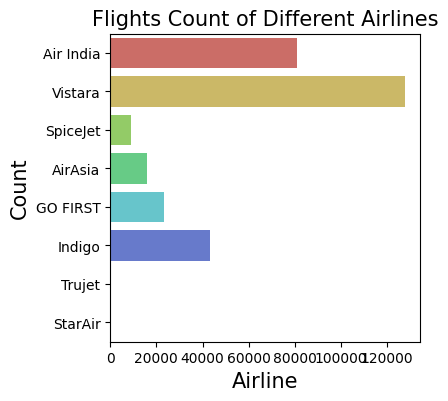

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(Final_data['airline'],palette='hls')
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

**Economy to business class**

<ipython-input-37-27843ab25575>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class',y='price',data=Final_data,palette='hls')


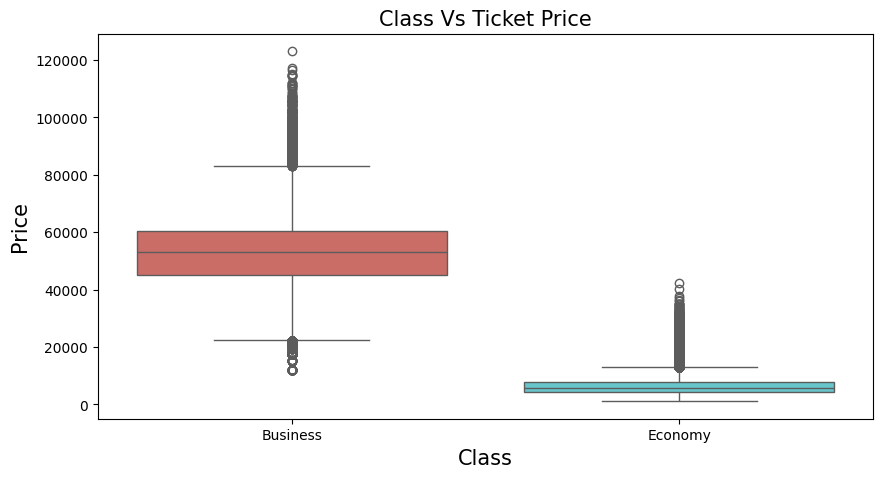

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='class',y='price',data=Final_data,palette='hls')
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [ ]:
data3=Final_data.groupby(['flight','airline','class'],as_index=False).count()
data3['class'].value_counts()

class
Economy     1568
Business     295
Name: count, dtype: int64

**Price variation from different airlines**

In [ ]:
# Group data by airline and calculate the mean price for each airline
avg_price_per_airline = Final_data.groupby('airline')['price'].mean().reset_index()

# Sort the result in descending order based on the average price
avg_price_per_airline_sorted = avg_price_per_airline.sort_values(by='price', ascending=False)

# Display the summary
print(avg_price_per_airline_sorted)

     airline         price
7    Vistara  30396.536302
0  Air India  23506.647217
4   SpiceJet   6179.278881
2   GO FIRST   5651.930578
3     Indigo   5324.216303
5    StarAir   4932.655738
1    AirAsia   4091.072742
6     Trujet   3244.634146


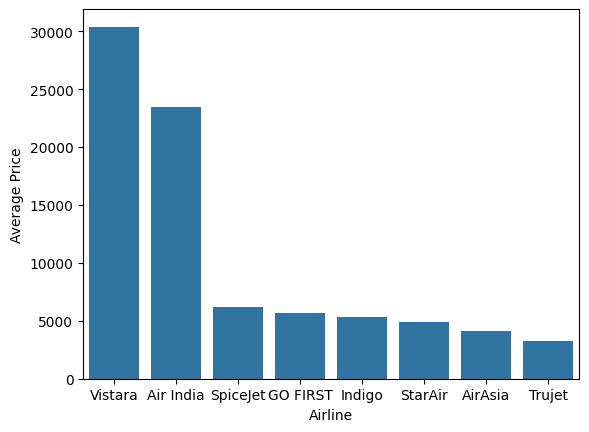

In [ ]:
avg_price = Final_data.groupby('airline')['price'].mean().reset_index()
avg_price = avg_price.sort_values(by='price',ascending=False)
sns.barplot(x='airline', y='price', data=avg_price)

plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.show()

**summarize the variation in prices between Economy and Business class flights**

In [ ]:
# Summary statistics for Economy class flights
summary_economy = economy_flights['price'].describe()

# Summary statistics for Business class flights
summary_business = business_flights['price'].describe()

# Summary comparison between Economy and Business class flights
summary_comparison = pd.DataFrame({
    'Economy Class': summary_economy,
    'Business Class': summary_business
})

print(summary_comparison)

       Economy Class  Business Class
count  206774.000000    93487.000000
mean     6571.190701    52540.081124
std      3743.442838    12969.314606
min      1105.000000    12000.000000
25%      4173.000000    45185.000000
50%      5772.000000    53164.000000
75%      7746.000000    60396.000000
max     42349.000000   123071.000000


**Price variation from different airlines**

<ipython-input-42-2c0f3d980a7c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=Final_data['airline'],y=Final_data['price'],palette='hls')


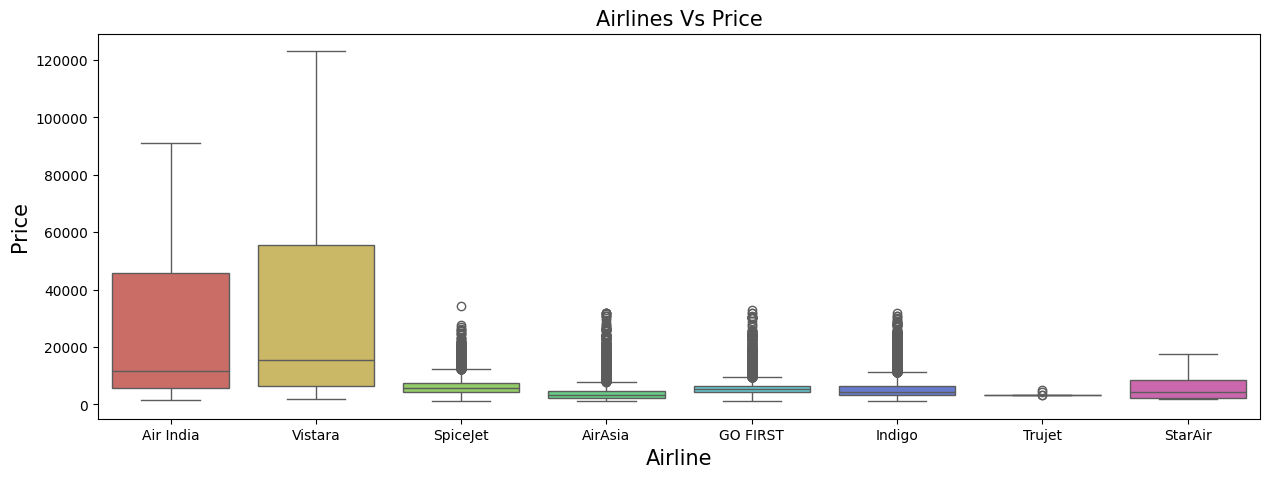

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x=Final_data['airline'],y=Final_data['price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()



**Most of the Airlines has Economic Class as common**


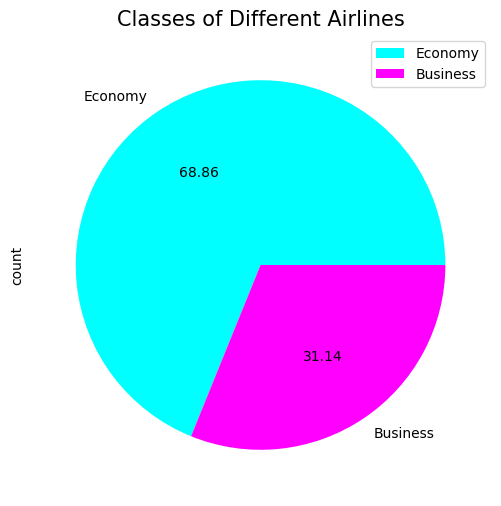

In [ ]:
plt.figure(figsize=(8,6))
Final_data['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

**count the number of flights in month and day of week**

In [ ]:
data4=Final_data.groupby(['month', 'day_of_week']).size()
data4

month  day_of_week
2      Friday         14037
       Monday         18100
       Saturday       15979
       Sunday         16493
       Thursday       12056
       Tuesday        11780
       Wednesday      12144
3      Friday         25857
       Monday         25973
       Saturday       25830
       Sunday         25906
       Thursday       31966
       Tuesday        32261
       Wednesday      31879
dtype: int64

In [ ]:
backup_data=Final_data.copy()

**MACHINE LEARNING**

**Histograms**

array([[<Axes: title={'center': 'num_code'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'Population_from'}>,
        <Axes: title={'center': 'Population_to'}>,
        <Axes: title={'center': 'Area_from'}>],
       [<Axes: title={'center': 'Area_to'}>,
        <Axes: title={'center': 'Latitude_x'}>,
        <Axes: title={'center': 'Longitude_x'}>,
        <Axes: title={'center': 'Latitude_y'}>,
        <Axes: title={'center': 'Longitude_y'}>],
       [<Axes: title={'center': 'dew'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'tempmax'}>,
        <Axes: title={'center': 'tempmin'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'arr_hour'}>,
        <Axes: title={'center': 'arr_minutes'}>,
        <Axes: title={'center': 'dep_hour'}>],
       [<Axes: title={'center': 'dep_minutes'}>, <Axes: >, <Axes: >,
   

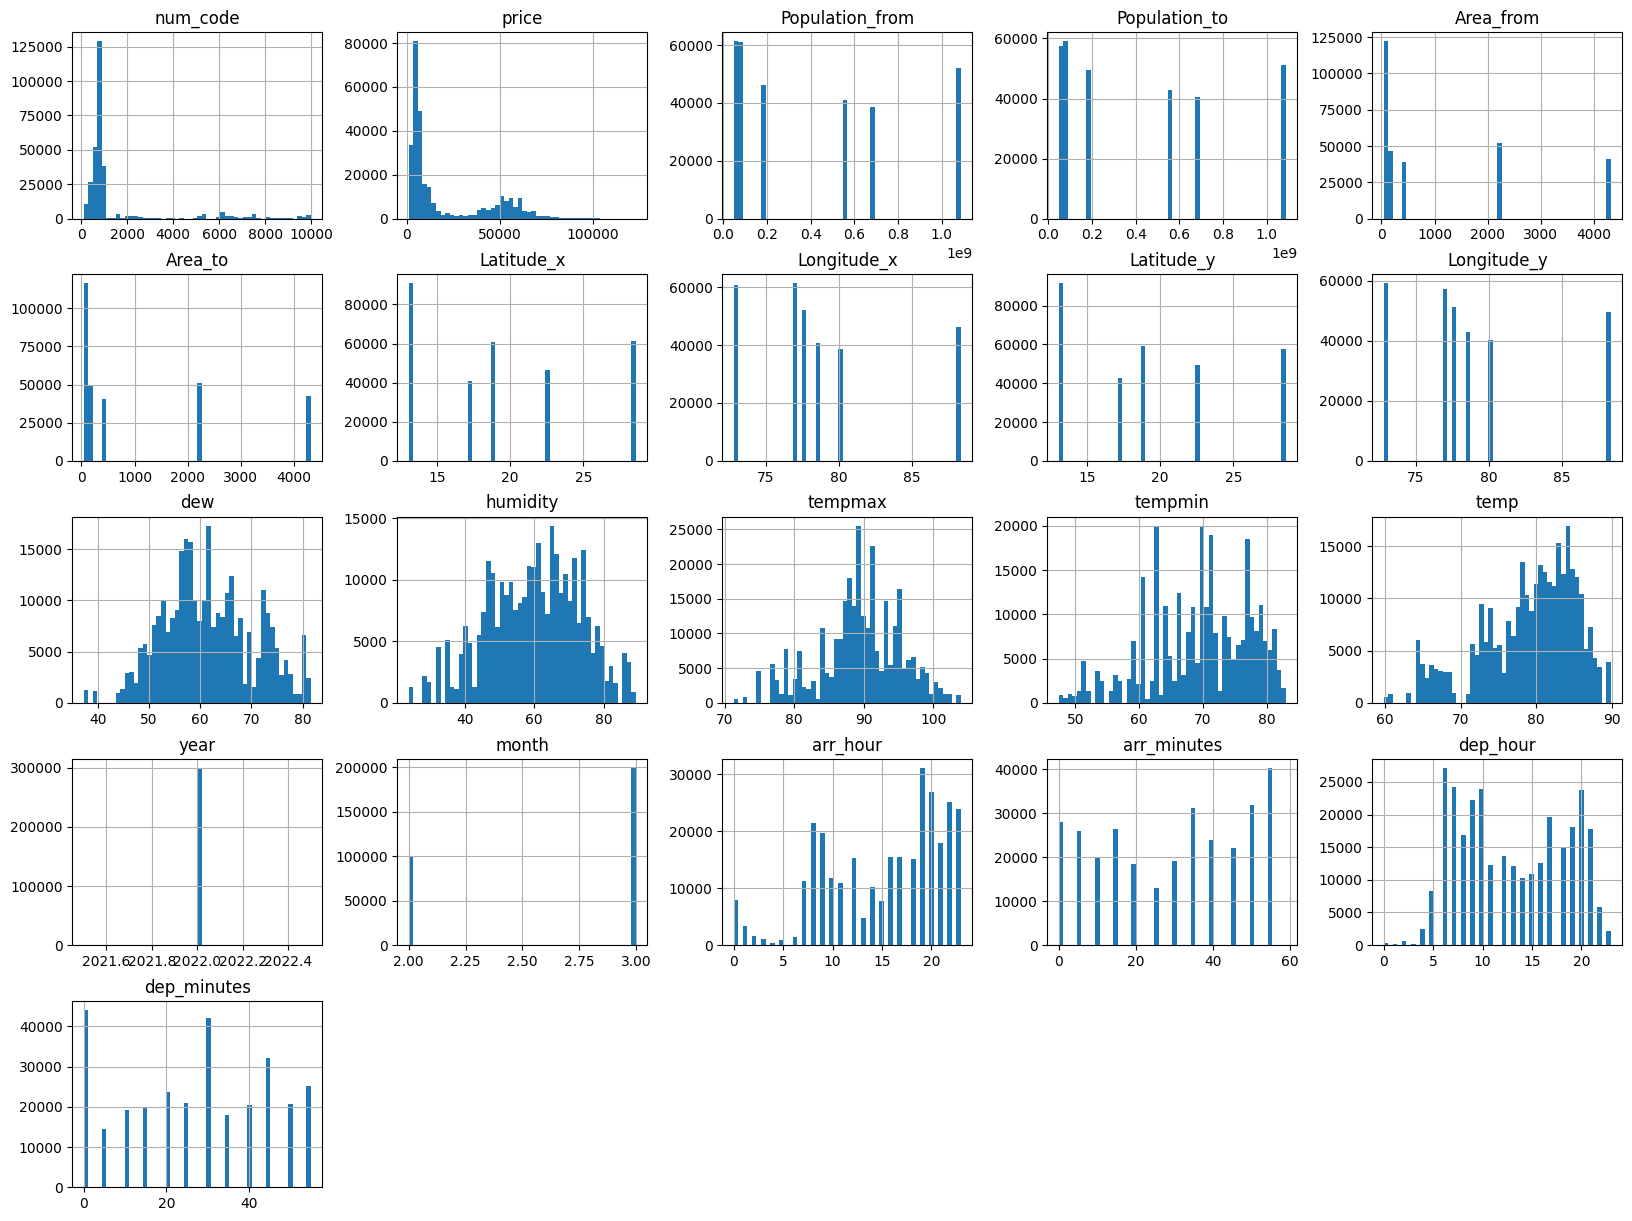

In [ ]:
Final_data.hist(bins=50, figsize=(20, 15))

**converting object data type to numerical data type**

In [ ]:

from sklearn.preprocessing import LabelEncoder


# Label encoding for non-numerical columns
non_numerical_columns = Final_data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for column in non_numerical_columns:
    Final_data[column] = label_encoder.fit_transform(Final_data[column])



**Correlation matrix**

In [ ]:
# Generate correlation matrix
correlation_matrix = Final_data.corr()

# Print correlation matrix
print(correlation_matrix)


                     date   airline   ch_code  num_code  dep_time      from  \
date             1.000000 -0.003186 -0.005889 -0.004076 -0.004025 -0.003539   
airline         -0.003186  1.000000  0.880926 -0.114045  0.026465 -0.035574   
ch_code         -0.005889  0.880926  1.000000 -0.242023  0.046855 -0.028387   
num_code        -0.004076 -0.114045 -0.242023  1.000000 -0.014282 -0.007572   
dep_time        -0.004025  0.026465  0.046855 -0.014282  1.000000  0.032734   
from            -0.003539 -0.035574 -0.028387 -0.007572  0.032734  1.000000   
time_taken      -0.038914 -0.005140  0.150970 -0.135620  0.141536  0.008914   
stop            -0.012266 -0.063775 -0.091628  0.080764 -0.015850  0.013729   
arr_time        -0.021655  0.094217  0.069872 -0.003994 -0.154845  0.017231   
to              -0.005319 -0.038949 -0.034538  0.009625 -0.005383 -0.222945   
class            0.013021 -0.178120 -0.254185  0.217168 -0.038766 -0.000024   
price           -0.091917  0.243711  0.311008 -0.212

In [ ]:
# Assuming correlation_matrix is the correlation matrix generated earlier

# Exclude 'price' column from correlation matrix and sort by absolute correlation values
top_features = correlation_matrix['price'].drop('price').abs().sort_values(ascending=False)

print(top_features)

class              0.937868
ch_code            0.311008
flight             0.306189
airline            0.243711
num_code           0.212865
time_taken         0.206048
stop               0.198187
month              0.092322
date               0.091917
arr_hour           0.074238
arr_time           0.072872
tempmax            0.057045
arr_minutes        0.044051
temp               0.042388
Latitude_y         0.042290
State_y            0.040364
State              0.038021
Latitude_x         0.036108
dep_time           0.032257
dep_hour           0.031252
dep_minutes        0.028230
tempmin            0.024841
humidity           0.023885
Population_to      0.023743
Population_from    0.018635
Longitude_y        0.018291
Longitude_x        0.012397
day_of_week        0.005479
icon               0.004900
to                 0.004895
from               0.004683
dew                0.004173
Area_from          0.004088
Area_to            0.001648
year                    NaN
Name: price, dtype: 

In [ ]:
# storing the Dependent Variables in X and Independent Variable in Y
selected_features= ['class','flight','airline','Population_from','Population_to','day_of_week','stop','temp','dep_hour']
x=Final_data[selected_features]
y=Final_data['price']

In [ ]:
#Load required libraries
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

**Converting datatypes for building the model**

In [ ]:
numeric_features = x.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x.select_dtypes(include=['object']).columns

#Numerical Features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

#Categorical Features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [ ]:
# Splitting the Data into Training set and Testing Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((240208, 9), (60053, 9), (240208,), (60053,))

**REGRESSION MODEL BUILDING**

In [ ]:
# Build the Regression / Regressor models

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [ ]:

# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelrfr = RandomForestRegressor()

modelKNN = KNeighborsRegressor(n_neighbors=5)
modelRE=Ridge()
modelLO=linear_model.Lasso(alpha=0.1)


# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelKNN,modelRE,modelLO]


In [ ]:

# Dictionary to store the results
results = {}

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

for model in MM:
    # Fit the model
    model.fit(x_train, y_train)

    # Predict on training and test data
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Calculate metrics
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

    # Add to results
    results[model.__class__.__name__] = {
        'Training Error': train_mse,
        'Testing Error': test_mse,
        'Training RMSE': train_rmse,
        'Testing RMSE': test_rmse,
        'Training R2': train_r2,
        'Testing R2': test_r2,
        'Training MAE': train_mae,
        'Testing MAE': test_mae,
        'Training MAPE': train_mape,
        'Testing MAPE': test_mape,
    }

# Display the results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value}")
    print("\n")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.06695e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model: LinearRegression
Training Error: 53761185.61549057
Testing Error: 53564347.23315842
Training RMSE: 7332.201962268264
Testing RMSE: 7318.766783629495
Training R2: 0.895729211291427
Testing R2: 0.8956130351797519
Training MAE: 4825.8691184530435
Testing MAE: 4801.552787297606
Training MAPE: 43.76819481571694
Testing MAPE: 43.61794117619343


Model: DecisionTreeRegressor
Training Error: 4940055.740710656
Testing Error: 11038104.71991134
Training RMSE: 2222.623616519598
Testing RMSE: 3322.364326787678
Training R2: 0.9904186728315048
Testing R2: 0.9784887838908205
Training MAE: 655.3652027925039
Testing MAE: 1211.925153897366
Training MAPE: 3.2551269962335203
Testing MAPE: 8.446458138776027


Model: RandomForestRegressor
Training Error: 5206406.410330671
Testing Error: 9596448.094232522
Training RMSE: 2281.7551162056525
Testing RMSE: 3097.8134376092635
Training R2: 0.9899020809060035
Testing R2: 0.9812983049106987
Training MAE: 795.5524852176825
Testing MAE: 1206.305808385294
Trainin

**ACTUAL VS PREDICTED GRAPH OF REGRESSION MODELS FOR SELECTED FEATURES**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.06695e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


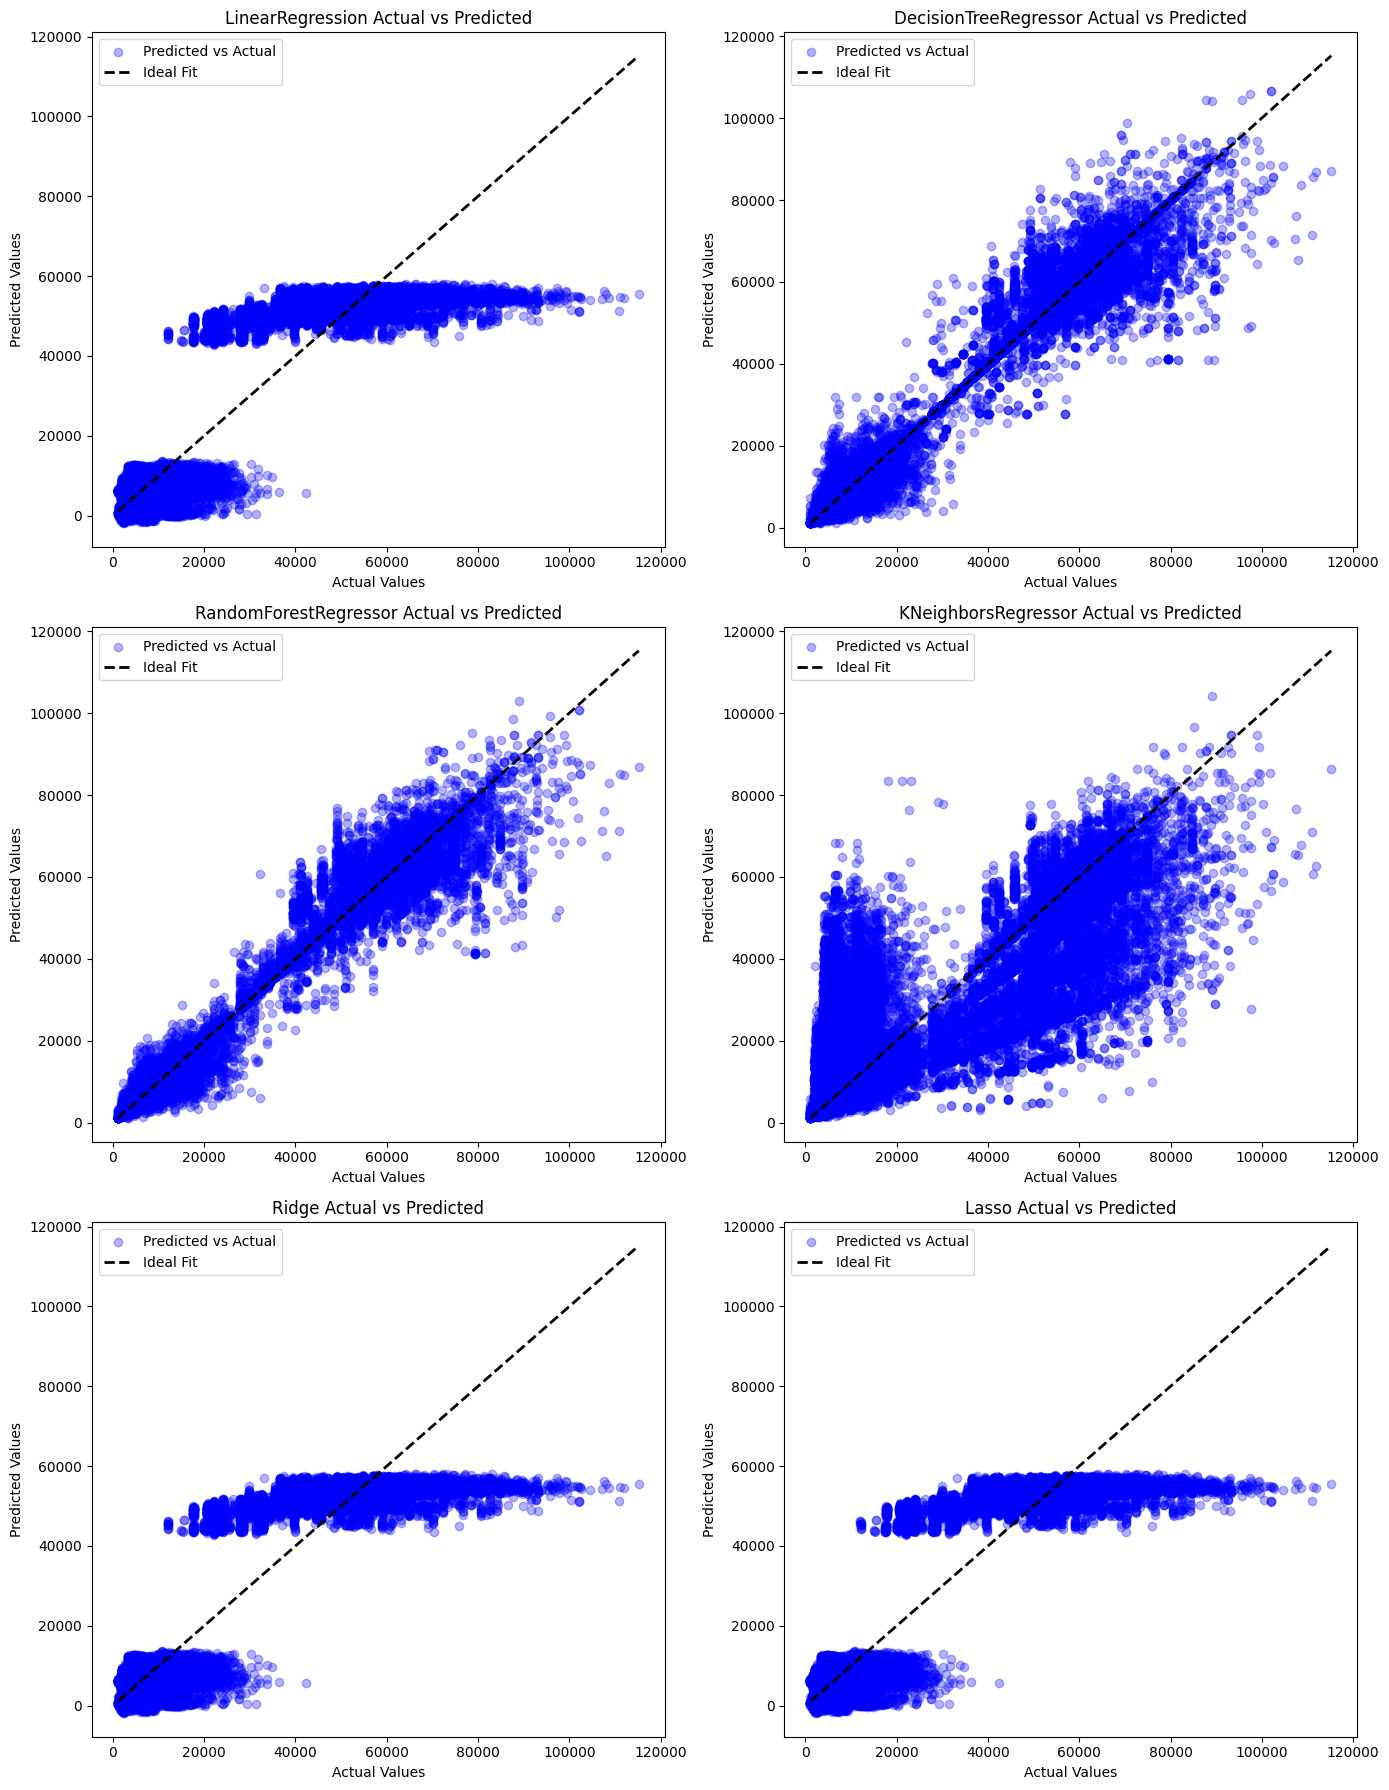

In [ ]:


# Create a figure and set of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))
axes = axes.flatten()  # Flatten the array of axes for easier iteration

# Iterate over each model and its corresponding axis
for idx, model in enumerate(MM):
    # Fit the model
    model.fit(x_train, y_train)
    # Predict on testing data
    y_test_pred = model.predict(x_test)

    # Actual vs Predicted scatter plot
    ax = axes[idx]
    ax.scatter(y_test, y_test_pred, alpha=0.3, color='blue', label='Predicted vs Actual')
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')  # Ideal line for reference
    ax.set_title(f'{model.__class__.__name__} Actual vs Predicted')
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


**COMPARISION OF REGRESSION MODELS**

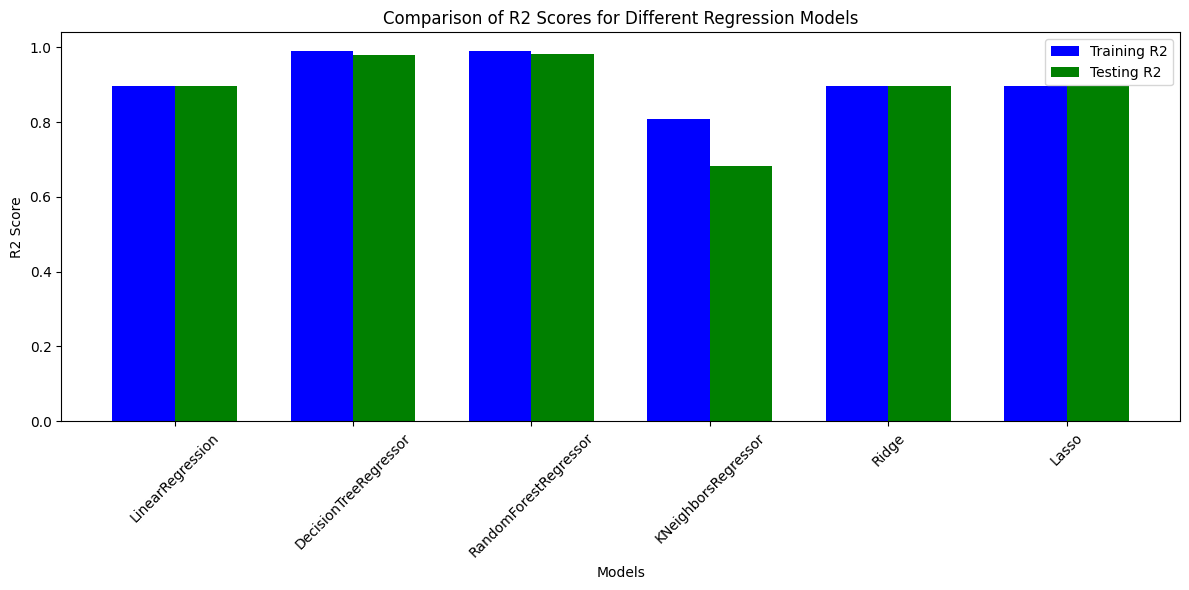

In [ ]:


# Assuming 'results' dictionary is already filled with model evaluation metrics
# Extract model names from the results dictionary keys
model_names = list(results.keys())

# Initialize empty lists to store R2 scores
train_r2_scores = []
test_r2_scores = []

# Extract R2 scores for comparison
for model_name in model_names:
    if 'Training R2' in results[model_name]:
        train_r2_scores.append(results[model_name]['Training R2'])
    if 'Testing R2' in results[model_name]:
        test_r2_scores.append(results[model_name]['Testing R2'])

# Set up the bar widths and indices for bar positions
bar_width = 0.35
index = np.arange(len(model_names))

# Plotting the bar chart for R2 scores
plt.figure(figsize=(12, 6))
if train_r2_scores:
    train_bars = plt.bar(index, train_r2_scores, bar_width, label='Training R2', color='b')
if test_r2_scores:
    test_bars = plt.bar(index + bar_width, test_r2_scores, bar_width, label='Testing R2', color='g')

# Add title and labels
plt.title('Comparison of R2 Scores for Different Regression Models')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.xticks(index + bar_width / 2, model_names, rotation=45)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


**Choosing the best parameters**

In [ ]:
# Sample 10% of the data
sampled_data = Final_data.sample(frac=0.1, random_state=42)
# Split features and target variables
selected_features= ['class','flight','airline','Population_from','Population_to','day_of_week','stop','temp','dep_hour']
X=sampled_data[selected_features]
y=sampled_data['price']
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the models and their respective parameter grids
models_params = {
    'RandomForestRegressor': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [10, 20, None],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(random_state=42),
        'params': {
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    }
}

# Dictionary to store the best models
best_models = {}

# Perform GridSearchCV
for model_name, mp in models_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
    clf.fit(X_train, y_train)
    best_models[model_name] = clf.best_estimator_
    print(f"Best parameters for {model_name}: {clf.best_params_}")
    print(f"Best score for {model_name}: {-clf.best_score_}")



Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for RandomForestRegressor: {'max_depth': 20, 'min_samples_leaf': 2, 'n_estimators': 200}
Best score for RandomForestRegressor: 13786347.380451273
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for DecisionTreeRegressor: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best score for DecisionTreeRegressor: 17873689.079628076


In [ ]:
# Evaluate the best models
results = {}
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'R2': r2, 'MAE': mae}

# Print results
for model_name, metrics in results.items():
    print(f"Results for {model_name}:")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value}")

Results for RandomForestRegressor:
MSE: 13692501.506663926
R2: 0.9730133160836723
MAE: 1742.3783440033635
Results for DecisionTreeRegressor:
MSE: 17210653.650731415
R2: 0.9660793559277948
MAE: 1931.717269463665


**REGRESSION MODEL BUILDING USING ALL FEATURES**

In [ ]:
# storing the Dependent Variables in X and Independent Variable in Y
x1=Final_data.drop(['price'],axis= 1)
y1=Final_data['price']

In [ ]:
numeric_features1 = x1.select_dtypes(include=['int64', 'float64']).columns
categorical_features11 = x1.select_dtypes(include=['object']).columns

#Numerical Features
numeric_transformer1 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

#Categorical Features
categorical_transformer1 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer1, numeric_features1),
        ('cat', categorical_transformer1, categorical_features11)])

In [ ]:
# Splitting the Data into Training set and Testing Set
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.20,random_state=42)
x1_train.shape,x1_test.shape,y1_train.shape,y1_test.shape

((240208, 35), (60053, 35), (240208,), (60053,))

In [ ]:
# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg1 = LinearRegression()
modeldcr1 = DecisionTreeRegressor()
modelrfr1 = RandomForestRegressor()

modelKNN1 = KNeighborsRegressor(n_neighbors=5)
modelRE1=Ridge()
modelLO1=linear_model.Lasso(alpha=0.1)


# Evalution matrix for all the algorithms

MM = [modelmlg1, modeldcr1, modelrfr1, modelKNN1,modelRE1,modelLO1]

In [ ]:
# Dictionary to store the results
results1 = {}

# Function to calculate MAPE
def mean_absolute_percentage_error(y1_true, y1_pred):
    y1_true, y1_pred = np.array(y1_true), np.array(y1_pred)
    return np.mean(np.abs((y1_true - y1_pred) / y1_true)) * 100

for model in MM:
    # Fit the model
    model.fit(x1_train, y1_train)

    # Predict on training and test data
    y1_train_pred = model.predict(x1_train)
    y1_test_pred = model.predict(x1_test)

    # Calculate metrics
    train_rmse = mean_squared_error(y1_train, y1_train_pred, squared=False)
    test_rmse = mean_squared_error(y1_test, y1_test_pred, squared=False)
    train_mse = mean_squared_error(y1_train, y1_train_pred)
    test_mse = mean_squared_error(y1_test, y1_test_pred)
    train_mae = mean_absolute_error(y1_train, y1_train_pred)
    test_mae = mean_absolute_error(y1_test, y1_test_pred)
    train_r2 = r2_score(y1_train, y1_train_pred)
    test_r2 = r2_score(y1_test, y1_test_pred)
    train_mape = mean_absolute_percentage_error(y1_train, y1_train_pred)
    test_mape = mean_absolute_percentage_error(y1_test, y1_test_pred)

    # Add to results
    results1[model.__class__.__name__] = {
        'Training Error': train_mse,
        'Testing Error': test_mse,
        'Training RMSE': train_rmse,
        'Testing RMSE': test_rmse,
        'Training R2': train_r2,
        'Testing R2': test_r2,
        'Training MAE': train_mae,
        'Testing MAE': test_mae,
        'Training MAPE': train_mape,
        'Testing MAPE': test_mape,
    }

# Display the results
for model_name, metrics in results1.items():
    print(f"Model: {model_name}")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value}")
    print("\n")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.61281e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model: LinearRegression
Training Error: 47759496.9030939
Testing Error: 47852128.18762533
Training RMSE: 6910.824618169231
Testing RMSE: 6917.5232697566935
Training R2: 0.9073695947476398
Testing R2: 0.9067450892297355
Training MAE: 4527.998143851486
Testing MAE: 4522.620250819609
Training MAPE: 40.8579820002955
Testing MAPE: 40.89221243235793


Model: DecisionTreeRegressor
Training Error: 42245.47870942405
Testing Error: 7509999.768788958
Training RMSE: 205.53704948116788
Testing RMSE: 2740.43787902389
Training R2: 0.999918064132441
Testing R2: 0.9853644052031059
Training MAE: 10.07796437531917
Testing MAE: 806.3984175089781
Training MAPE: 0.04107122374566022
Testing MAPE: 5.65794892172354


Model: RandomForestRegressor
Training Error: 598931.8089014642
Testing Error: 4165525.669732145
Training RMSE: 773.9068476899944
Testing RMSE: 2040.961947154367
Training R2: 0.9988383609590854
Testing R2: 0.9918821640885228
Training MAE: 295.1009487202527
Testing MAE: 787.4076017809208
Training MA

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.737e+12, tolerance: 1.238e+10
  model = cd_fast.enet_coordinate_descent(


**CLASSIFICATION OF PRICE RANGES**

In [ ]:
price_min = Final_data['price'].min()
price_max = Final_data['price'].max()
print(price_min)
print(price_max)

1105
123071


In [ ]:
# Set up price ranges for classification
ranges_values = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, float('inf')]
price_ranges = [f"Price Range {i}" for i in range(1, len(ranges_values))]

# Add a new column 'price_range' based on the price ranges
Final_data['price_range'] = pd.cut(Final_data['price'], bins=ranges_values, labels=price_ranges, right=False)

In [ ]:
Final_data.sample(n=20)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,...,temp,year,flight,month,day_of_week,arr_hour,arr_minutes,dep_hour,dep_minutes,price_range
132540,11,7,7,858,44,0,132,0,194,2,...,76.8,2022,1514,2,5,18,5,6,40,Price Range 2
137951,16,4,6,401,35,0,210,0,262,2,...,74.0,2022,1326,2,3,23,45,5,55,Price Range 1
281789,26,3,1,269,83,1,104,0,208,4,...,82.5,2022,162,3,6,19,15,9,55,Price Range 1
276025,19,0,2,539,167,1,206,0,103,3,...,82.0,2022,765,3,6,10,30,17,0,Price Range 1
264684,6,0,2,766,100,1,97,0,218,5,...,80.0,2022,847,2,4,20,5,11,20,Price Range 6
199105,27,7,7,778,147,4,88,0,257,0,...,79.9,2022,1467,3,4,23,20,15,20,Price Range 7
152620,29,3,1,6491,120,0,51,0,195,2,...,77.9,2022,496,3,2,18,10,13,5,Price Range 1
186239,14,3,1,2127,5,4,20,39,37,2,...,72.8,2022,95,2,0,3,45,1,15,Price Range 1
29361,24,4,6,3002,57,2,176,0,250,0,...,71.8,2022,1291,3,1,22,45,7,45,Price Range 1
99240,30,7,7,613,110,5,121,38,250,1,...,88.2,2022,1436,3,3,22,45,12,15,Price Range 1


In [ ]:
# Split features and target variables
X = Final_data.drop(columns=['price', 'price_range'])
y = Final_data['price_range']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.4 MB/s eta 0:00:00


In [ ]:
##Load required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, confusion_matrix, f1_score,classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix, precision_recall_curve

In [ ]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

#Numerical Features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

#Categorical Features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

**CLASSIFICATION MODEL BULDING**

**Logistic Regression**

In [ ]:
# Create logistic regression pipeline

log_reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=10000))
])

In [ ]:
# Initialize and train Logistic Regression model
log_model = log_reg_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_log = log_model.predict(X_test)
y_pred_prob_log = log_model.predict_proba(X_test)

def model_evaluation(y_pred, y_pred_prob, test_x, test_y):
    # Model Evaluation
    accuracy = accuracy_score(test_y, y_pred)
    precision_macro = precision_score(test_y, y_pred, average='macro')
    recall_macro = recall_score(test_y, y_pred, average='macro')
    f1_macro = f1_score(test_y, y_pred, average='macro')
    conf_matrix = confusion_matrix(test_y, y_pred)
    specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
    print("Accuracy:", accuracy)
    print("Precision (Macro):", precision_macro)
    print("Recall (Macro):", recall_macro)
    print("F1 Score (Macro):", f1_macro)
    print("\nConfusion Matrix:",conf_matrix)
    print("Specificity:", specificity)


print("Logistic Regression Test")
model_evaluation(y_pred_log, y_pred_prob_log, X_test, y_test)

Logistic Regression Test


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.7676052820008992
Precision (Macro): 0.36360432235150314
Recall (Macro): 0.326381416493653
F1 Score (Macro): 0.3276349843525624

Confusion Matrix: [[33402     0     0     0  1529     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     4     4    14    50     1     0]
 [    0     0     0     0     0     0     3     1     3     9     0     0]
 [    0     0     0     0     0     0     0     0     1     2     1     0]
 [ 2651     0     0     0  3527    98     0     0     0     0     0     0]
 [   98     0     0     0   253   925    30    74    16     0     0     0]
 [    2     0     0     0    14   333   322   327   703    12     1     1]
 [    0     0     0     0     2    61   165  1306  1889   524     0     0]
 [    0     0     0     0     0    16   148   801  4619  1110     6     1]
 [    0     0     0     0     0    17    15   258  1542  1989     8     0]
 [    0     0     0     0     0     5    22    32   319   450     7     2]
 [    0     0    

**Decision Tree**

In [ ]:
# Decision Tree Pipeline
decision_tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', DecisionTreeClassifier())])

In [ ]:
# Initialize and train Decision Tree model
DT_model = decision_tree_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_dt = DT_model.predict(X_test)
y_pred_prob_dt = DT_model.predict_proba(X_test)
print("Decision Tree Test")
model_evaluation(y_pred_dt, y_pred_prob_dt, X_test, y_test)


Decision Tree Test
Accuracy: 0.9391204436081462
Precision (Macro): 0.6794021423108269
Recall (Macro): 0.6942275584942146
F1 Score (Macro): 0.6856212680867563

Confusion Matrix: [[34242     0     0     0   666    20     3     0     0     0     0     0]
 [    0    24     6     1     0     0     1     0     1    11    10    19]
 [    0     3     5     2     0     0     0     0     0     0     1     5]
 [    0     1     0     1     0     0     0     0     0     0     0     2]
 [  640     0     0     0  5455   172     9     0     0     0     0     0]
 [   29     0     0     0   145  1169    33    13     7     0     0     0]
 [    3     0     0     0     2    40  1554    94    19     2     1     0]
 [    0     0     0     0     0    20    63  3738    80    42     4     0]
 [    0     3     1     0     0     5    15   102  6221   272    68    14]
 [    0    16     0     0     0     0     2    23   207  3320   206    55]
 [    0    20     1     0     0     0     0     4    67   195   503    47

**Random Forest and Gradient boosting**

In [ ]:
# Random Forest Pipeline
random_forest_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier())])

# XGBoost Pipeline
gradient_boosting_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', XGBClassifier())])

In [ ]:
# Initialize and train Random Forest model
RF_model = random_forest_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_rf = RF_model.predict(X_test)
y_pred_prob_rf = RF_model.predict_proba(X_test)

print("Random Forest Test")
model_evaluation(y_pred_rf, y_pred_prob_rf, X_test, y_test)

Random Forest Test
Accuracy: 0.9520756664945964
Precision (Macro): 0.6937714633191955
Recall (Macro): 0.6374462447837198
F1 Score (Macro): 0.6596685423836254

Confusion Matrix: [[34690     0     0     0   236     5     0     0     0     0     0     0]
 [    0    17     5     0     0     0     0     1     0    13    13    24]
 [    0     2     0     0     0     0     0     0     0     2     2    10]
 [    0     0     0     0     0     0     0     0     0     1     0     3]
 [  722     0     0     0  5514    40     0     0     0     0     0     0]
 [   36     0     0     0   194  1154     8     2     2     0     0     0]
 [    1     0     0     0     7    48  1630    22     4     3     0     0]
 [    0     1     0     0     0    22    76  3799    41     8     0     0]
 [    0     0     0     0     0     7    18   112  6450    89    24     1]
 [    0     4     0     0     0     0     1    27   371  3344    64    18]
 [    0     9     2     0     0     0     0     5    99   271   426    25

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder on the target variable and transform the labels to numerical categories
y_train_encoded = label_encoder.fit_transform(y_train)

# Initialize and train Gradient Boosting model
GB_model = gradient_boosting_pipeline.fit(X_train, y_train_encoded)

# Make predictions
y_pred_gb = GB_model.predict(X_test)
y_pred_prob_gb = GB_model.predict_proba(X_test)

y_test_encoded = label_encoder.transform(y_test)

print("Gradient Boosting Test")
model_evaluation(y_pred_gb, y_pred_prob_gb, X_test, y_test_encoded)

Gradient Boosting Test
Accuracy: 0.9394867866717733
Precision (Macro): 0.7235737073203872
Recall (Macro): 0.6191670072631
F1 Score (Macro): 0.6516872074666775

Confusion Matrix: [[34542     0     0     0   384     5     0     0     0     0     0     0]
 [    0    16     0     0     0     0     0     0     4    19    13    21]
 [    0     2     2     0     0     0     0     0     0     1     2     9]
 [    0     0     0     0     0     0     0     0     0     0     1     3]
 [ 1013     0     0     0  5232    30     1     0     0     0     0     0]
 [   32     0     0     0   232  1112    12     7     1     0     0     0]
 [    3     0     0     0     5    42  1620    30    10     4     1     0]
 [    0     1     0     0     0    23    85  3790    41     6     1     0]
 [    0     0     0     0     0     5    23   161  6438    57    14     3]
 [    0     2     0     0     0     0     2    45   482  3224    63    11]
 [    0     3     1     0     0     0     0     7   136   355   319    1

**KNN**

In [ ]:
# k-Nearest Neighbors Pipeline
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', KNeighborsClassifier())])

In [ ]:
# Initialize and train k-Nearest Neighbors model
KNN_model = knn_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_knn = KNN_model.predict(X_test)
y_pred_prob_knn = KNN_model.predict_proba(X_test)

print("k-Nearest Neighbors Test")
model_evaluation(y_pred_knn, y_pred_prob_knn, X_test, y_test)

k-Nearest Neighbors Test
Accuracy: 0.8749937555159609
Precision (Macro): 0.5716678085212096
Recall (Macro): 0.5157186981251354
F1 Score (Macro): 0.5347184493615365

Confusion Matrix: [[34049     0     0     0   867    10     0     3     2     0     0     0]
 [    0    16     2     0     0     0     0     5     5    23     9    13]
 [    0     3     2     0     0     0     0     0     1     3     3     4]
 [    0     0     1     0     0     0     0     0     0     1     1     1]
 [ 1400     0     0     0  4820    53     0     1     1     1     0     0]
 [   83     0     0     0   232   975    65    13    26     2     0     0]
 [   23     0     0     0    12    93  1232   136   195    23     1     0]
 [   21     4     0     0     9    25   161  3057   529   130     5     6]
 [   25     4     1     0     9    13   152   494  5482   476    34    11]
 [    5    15     0     1     3     3    26   178   777  2683   103    35]
 [    1    21     2     0     3     2     9    34   214   362   167

**Cat Boost**

In [ ]:
# CatBoost Pipeline
catboost_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, loss_function='MultiClass', random_seed=42))
])

# Initialize and train CatBoost model
CAT_model = catboost_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_cat = CAT_model.predict(X_test)
y_pred_prob_cat = CAT_model.predict_proba(X_test)

print("CatBoost Test")
model_evaluation(y_pred_cat, y_pred_prob_cat, X_test, y_test)

0:	learn: 1.8233418	total: 2.76s	remaining: 4m 33s
1:	learn: 1.5660242	total: 5.72s	remaining: 4m 40s
2:	learn: 1.3943673	total: 7.17s	remaining: 3m 51s
3:	learn: 1.2663960	total: 8.6s	remaining: 3m 26s
4:	learn: 1.1648338	total: 10.1s	remaining: 3m 11s
5:	learn: 1.0800095	total: 12.4s	remaining: 3m 14s
6:	learn: 1.0093995	total: 13.9s	remaining: 3m 4s
7:	learn: 0.9530664	total: 15.5s	remaining: 2m 58s
8:	learn: 0.9026499	total: 18s	remaining: 3m 2s
9:	learn: 0.8597608	total: 20.1s	remaining: 3m
10:	learn: 0.8218383	total: 21.6s	remaining: 2m 54s
11:	learn: 0.7885085	total: 23s	remaining: 2m 48s
12:	learn: 0.7594923	total: 24.4s	remaining: 2m 43s
13:	learn: 0.7338457	total: 25.9s	remaining: 2m 38s
14:	learn: 0.7107339	total: 27.3s	remaining: 2m 34s
15:	learn: 0.6910665	total: 28.7s	remaining: 2m 30s
16:	learn: 0.6724020	total: 30.5s	remaining: 2m 28s
17:	learn: 0.6534815	total: 32.8s	remaining: 2m 29s
18:	learn: 0.6376554	total: 34.9s	remaining: 2m 28s
19:	learn: 0.6248187	total: 36.4s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.8759928729622167
Precision (Macro): 0.5744548288594338
Recall (Macro): 0.4593188521997084
F1 Score (Macro): 0.47634364920879896

Confusion Matrix: [[34018     0     0     0   913     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0    12    49     9     3]
 [    0     0     0     0     0     0     0     0     1     8     4     3]
 [    0     0     0     0     0     0     0     0     0     2     2     0]
 [ 1626     0     0     0  4645     5     0     0     0     0     0     0]
 [   54     0     0     0   300   930    37    43    29     3     0     0]
 [    4     0     0     0    12    49   993   324   304    29     0     0]
 [    0     0     0     0     1    19   127  3047   631   122     0     0]
 [    0     0     0     0     0     4    24   318  5885   465     5     0]
 [    0     0     0     0     0     0     1    57   741  3015    15     0]
 [    0     0     0     0     0     0     0    34   232   512    58     1]
 [    0     0   

**ENSEMBLE LEARNING-VOTING CLASSING**

In [ ]:
ensemble_classifier = VotingClassifier(estimators=[
    ('gb', gradient_boosting_pipeline),
    ('kn', knn_pipeline),
    ('ct', catboost_pipeline),
    ('dt', decision_tree_pipeline),
    ('rf', random_forest_pipeline)
], voting='soft')

#  Initialize and train Ensemble model
EN_model = ensemble_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_en = EN_model.predict(X_test)
y_pred_prob_en = EN_model.predict_proba(X_test)

print("Ensemble Test")
model_evaluation(y_pred_en, y_pred_prob_en, X_test, y_test)

0:	learn: 1.8233418	total: 2.56s	remaining: 4m 12s
1:	learn: 1.5660242	total: 4.32s	remaining: 3m 31s
2:	learn: 1.3943673	total: 5.76s	remaining: 3m 6s
3:	learn: 1.2663960	total: 7.2s	remaining: 2m 52s
4:	learn: 1.1648338	total: 8.66s	remaining: 2m 44s
5:	learn: 1.0800095	total: 10.1s	remaining: 2m 38s
6:	learn: 1.0093995	total: 11.5s	remaining: 2m 33s
7:	learn: 0.9530664	total: 13s	remaining: 2m 29s
8:	learn: 0.9026499	total: 15.1s	remaining: 2m 32s
9:	learn: 0.8597608	total: 17.5s	remaining: 2m 37s
10:	learn: 0.8218383	total: 19.1s	remaining: 2m 34s
11:	learn: 0.7885085	total: 20.6s	remaining: 2m 30s
12:	learn: 0.7594923	total: 22s	remaining: 2m 27s
13:	learn: 0.7338457	total: 23.4s	remaining: 2m 23s
14:	learn: 0.7107339	total: 24.9s	remaining: 2m 21s
15:	learn: 0.6910665	total: 26.3s	remaining: 2m 18s
16:	learn: 0.6724020	total: 27.8s	remaining: 2m 15s
17:	learn: 0.6534815	total: 30.1s	remaining: 2m 17s
18:	learn: 0.6376554	total: 32.5s	remaining: 2m 18s
19:	learn: 0.6248187	total: 

**COMPARISION OF CLASSIFICATION MODELS**

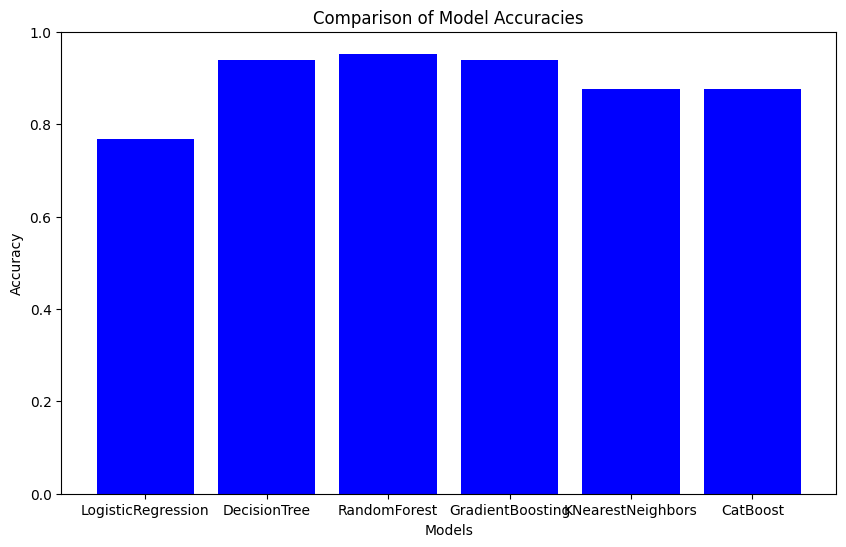

In [ ]:


def model_evaluation(y_pred, test_y):
    # Model Evaluation simplified to return accuracy
    accuracy = accuracy_score(test_y, y_pred)
    return accuracy

# Dictionary to store the accuracies of each model
accuracies = {}

# Evaluate each model and store the results
accuracies['LogisticRegression'] = model_evaluation(y_pred_log, y_test)
accuracies['DecisionTree'] = model_evaluation(y_pred_dt, y_test)
accuracies['RandomForest'] = model_evaluation(y_pred_rf, y_test)
accuracies['GradientBoosting'] = model_evaluation(y_pred_gb, y_test_encoded) # Make sure y_test_encoded is used here as GB was trained on encoded labels
accuracies['KNearestNeighbors'] = model_evaluation(y_pred_knn, y_test)
accuracies['CatBoost'] = model_evaluation(y_pred_cat, y_test)

# Plotting the accuracies


model_names = list(accuracies.keys())
accuracy_scores = list(accuracies.values())

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color='b')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)  # Set y-axis limits to show accuracies from 0 to 1
plt.show()


In [ ]:
# Sample 10% of the data
sampled_data = Final_data.sample(frac=0.1, random_state=42)
# Split features and target variables
X = sampled_data.drop(columns=['price', 'price_range'])
y = sampled_data['price_range']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



**Choosing Best parameters for a model**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier,
                           param_grid=param_grid_rf,
                           cv=5,             # Number of folds for cross-validation
                           scoring='accuracy',  # Scoring metric
                           n_jobs=-1)        # Number of jobs to run in parallel

# Perform GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (Accuracy):", best_score)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score (Accuracy): 0.9006661115736886


**CLASSIFICATION MODEL USING SELECTED FEATURES**

In [ ]:
# storing the Dependent Variables in X and Independent Variable in Y
selected_features1= ['class','flight','airline','Population_from','Population_to','day_of_week','stop','temp','dep_hour']
X=Final_data[selected_features1]
y=Final_data['price_range']

In [ ]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features1c = X.select_dtypes(include=['object']).columns

#Numerical Features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

#Categorical Features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [ ]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**LOGISTIC REGRESSION**

In [ ]:
# Create logistic regression pipeline

log_reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=10000))
])

In [ ]:
# Initialize and train Logistic Regression model
log_model= log_reg_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_log = log_model.predict(X_test)
y_pred_prob_log = log_model.predict_proba(X_test)

def model_evaluation(y_pred, y_pred_prob, test_x, test_y):
    # Model Evaluation
    accuracy = accuracy_score(test_y, y_pred)
    precision_macro = precision_score(test_y, y_pred, average='macro')
    recall_macro = recall_score(test_y, y_pred, average='macro')
    f1_macro = f1_score(test_y, y_pred, average='macro')
    conf_matrix = confusion_matrix(test_y, y_pred)
    specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
    print("Accuracy:", accuracy)
    print("Precision (Macro):", precision_macro)
    print("Recall (Macro):", recall_macro)
    print("F1 Score (Macro):", f1_macro)
    print("\nConfusion Matrix:",conf_matrix)
    print("Specificity:", specificity)


print("Logistic Regression Test")
model_evaluation(y_pred_log, y_pred_prob_log, X_test, y_test)

Logistic Regression Test


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.7099395533945015
Precision (Macro): 0.3593119654109594
Recall (Macro): 0.23889564912375036
F1 Score (Macro): 0.22389139878088923

Confusion Matrix: [[34234     0     0     0   697     0     0     0     0     0     0     0]
 [    0     0     0     0     0     4     4     0    64     1     0     0]
 [    0     0     0     0     0     3     1     0    12     0     0     0]
 [    0     0     0     0     0     1     0     0     3     0     0     0]
 [ 5547     0     0     0   623   106     0     0     0     0     0     0]
 [  296     0     0     0    54   817   113    47    69     0     0     0]
 [   12     0     0     0     4   451    78   149   911   110     0     0]
 [    1     0     0     0     0    62    34   831  2799   220     0     0]
 [    0     0     0     0     0    87    37   668  5682   227     0     0]
 [    0     0     0     0     0    75    13    51  3323   367     0     0]
 [    0     0     0     0     0    40    13     4   728    50     2     0]
 [    0     0  

**DECISION TREES**

In [ ]:
# Decision Tree Pipeline
decision_tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', DecisionTreeClassifier())])

In [ ]:
# Initialize and train Decision Tree model
DT_model = decision_tree_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_dt = DT_model.predict(X_test)
y_pred_prob_dt = DT_model.predict_proba(X_test)
print("Decision Tree Test")
model_evaluation(y_pred_dt, y_pred_prob_dt, X_test, y_test)

Decision Tree Test
Accuracy: 0.9212362413201672
Precision (Macro): 0.6500626006219619
Recall (Macro): 0.6080868970880652
F1 Score (Macro): 0.6232070778140886

Confusion Matrix: [[34221     0     0     0   683    26     1     0     0     0     0     0]
 [    0    25     1     0     0     0     0     5     2    11    13    16]
 [    0     0     2     1     0     0     0     0     0     4     1     8]
 [    0     0     0     0     0     0     0     0     0     0     1     3]
 [ 1010     0     0     0  5162   100     4     0     0     0     0     0]
 [   35     0     0     0   175  1130    33    18     5     0     0     0]
 [    1     0     0     0     5    44  1557    50    56     2     0     0]
 [    0     2     1     0     0    20    59  3547   238    71     3     6]
 [    0     1     0     0     0     8    22   152  6117   354    37    10]
 [    0    17     0     0     0     0     1    64   474  3132   113    28]
 [    0    16     1     0     0     0     0    42   123   296   340    19

**RANDOM FOREST AND GRADIENT BOOSTING**

In [ ]:
# Random Forest Pipeline
random_forest_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier())])

# XGBoost Pipeline
gradient_boosting_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', XGBClassifier())])

In [ ]:
# Initialize and train Random Forest model
RF_model = random_forest_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_rf = RF_model.predict(X_test)
y_pred_prob_rf = RF_model.predict_proba(X_test)

print("Random Forest Test")
model_evaluation(y_pred_rf, y_pred_prob_rf, X_test, y_test)

Random Forest Test


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9241669858291842
Precision (Macro): 0.6623278291807285
Recall (Macro): 0.6087509382709062
F1 Score (Macro): 0.6300462150006899

Confusion Matrix: [[34413     0     0     0   504    13     1     0     0     0     0     0]
 [    0    21     2     0     0     0     0     4     2    12    11    21]
 [    0     0     2     0     0     0     0     0     0     4     1     9]
 [    0     0     0     0     0     0     0     0     0     0     1     3]
 [ 1090     0     0     0  5110    76     0     0     0     0     0     0]
 [   38     0     0     0   184  1149    18     5     2     0     0     0]
 [    1     0     0     0     6    48  1576    36    45     3     0     0]
 [    0     2     0     0     0    20    65  3530   227    86     7    10]
 [    0     0     0     0     0     7    24   133  6090   399    38    10]
 [    0     5     0     0     0     0     1    55   429  3162   136    41]
 [    0     7     1     0     0     0     0    41   117   295   344    32]
 [    0    14    

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder on the target variable and transform the labels to numerical categories
y_train_encoded = label_encoder.fit_transform(y_train)

# Initialize and train Gradient Boosting model
GB_model = gradient_boosting_pipeline.fit(X_train, y_train_encoded)

# Make predictions
y_pred_gb = GB_model.predict(X_test)
y_pred_prob_gb = GB_model.predict_proba(X_test)

y_test_encoded = label_encoder.transform(y_test)

print("Gradient Boosting Test")
model_evaluation(y_pred_gb, y_pred_prob_gb, X_test, y_test_encoded)

Gradient Boosting Test
Accuracy: 0.9151915807703196
Precision (Macro): 0.6512718336400992
Recall (Macro): 0.5482883045557166
F1 Score (Macro): 0.5732888628033628

Confusion Matrix: [[34438     0     0     0   492     1     0     0     0     0     0     0]
 [    0    14     0     1     0     0     0     5     6    30     7    10]
 [    0     0     0     0     0     0     0     0     1     6     1     8]
 [    0     0     0     0     0     0     0     0     0     1     0     3]
 [ 1379     0     0     0  4875    22     0     0     0     0     0     0]
 [   53     0     0     0   244  1077    10     9     3     0     0     0]
 [    2     0     0     0    12    48  1571    24    55     3     0     0]
 [    0     0     0     0     1    22    90  3558   206    70     0     0]
 [    0     0     0     0     0     7    27   171  6177   296    23     0]
 [    0     1     0     0     0     0     1    73   658  3057    34     5]
 [    0     5     1     0     0     0     0    42   174   456   147  

**KNN CLASSIFICATION**

In [ ]:
# k-Nearest Neighbors Pipeline
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', KNeighborsClassifier())])

In [ ]:
# Initialize and train k-Nearest Neighbors model
KNN_model = knn_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_knn = KNN_model.predict(X_test)
y_pred_prob_knn = KNN_model.predict_proba(X_test)

print("k-Nearest Neighbors Test")
model_evaluation(y_pred_knn, y_pred_prob_knn, X_test, y_test)

k-Nearest Neighbors Test


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.8401911644713836
Precision (Macro): 0.5021004830702782
Recall (Macro): 0.45837185990011187
F1 Score (Macro): 0.47321938710187106

Confusion Matrix: [[33893     0     0     0  1030     8     0     0     0     0     0     0]
 [    0    22     0     0     0     5     1     6     6    12    10    11]
 [    0     0     0     0     0     0     3     0     4     5     1     3]
 [    0     1     0     0     0     0     0     0     0     2     1     0]
 [ 2064     0     0     0  4120    83     0     0     3     3     0     3]
 [  102     3     0     0   234   784   171    29    39    21     4     9]
 [    9     1     2     0     7   207   937   210   290    48     4     0]
 [    0     4     0     0     1    42   187  2728   784   176    14    11]
 [    0     1     1     0     4    43   169   637  5248   558    28    12]
 [    0    12     1     0     5    37    32   214   884  2501   103    40]
 [    0    18     1     0     1    24    21    68   183   320   185    16]
 [    0    14  

**CATBOOST**

In [ ]:
# CatBoost Pipeline
catboost_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, loss_function='MultiClass', random_seed=42))
])

# Initialize and train CatBoost model
CAT_model = catboost_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_cat = CAT_model.predict(X_test)
y_pred_prob_cat = CAT_model.predict_proba(X_test)

print("CatBoost Test")
model_evaluation(y_pred_cat, y_pred_prob_cat, X_test, y_test)

0:	learn: 1.9034714	total: 559ms	remaining: 55.4s
1:	learn: 1.6458728	total: 1.07s	remaining: 52.7s
2:	learn: 1.4721832	total: 1.6s	remaining: 51.7s
3:	learn: 1.3427624	total: 2.1s	remaining: 50.5s
4:	learn: 1.2403231	total: 2.63s	remaining: 49.9s
5:	learn: 1.1582106	total: 3.14s	remaining: 49.2s
6:	learn: 1.0911541	total: 3.66s	remaining: 48.7s
7:	learn: 1.0345021	total: 4.46s	remaining: 51.2s
8:	learn: 0.9839664	total: 5.38s	remaining: 54.5s
9:	learn: 0.9408873	total: 6.21s	remaining: 55.9s
10:	learn: 0.9032127	total: 7.03s	remaining: 56.9s
11:	learn: 0.8703496	total: 7.78s	remaining: 57.1s
12:	learn: 0.8424985	total: 8.48s	remaining: 56.8s
13:	learn: 0.8172689	total: 9.45s	remaining: 58s
14:	learn: 0.7918286	total: 10.3s	remaining: 58.4s
15:	learn: 0.7690663	total: 11.2s	remaining: 58.9s
16:	learn: 0.7488987	total: 12.1s	remaining: 59s
17:	learn: 0.7329457	total: 12.8s	remaining: 58.1s
18:	learn: 0.7153917	total: 13.3s	remaining: 56.6s
19:	learn: 0.7017691	total: 13.8s	remaining: 55

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.8414733651940786
Precision (Macro): 0.5448878214490435
Recall (Macro): 0.41197838941191683
F1 Score (Macro): 0.4323724346092526

Confusion Matrix: [[34353     0     0     0   578     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     1    17    48     5     2]
 [    0     0     0     0     0     0     0     0     1    12     0     3]
 [    0     0     0     0     0     0     0     0     0     3     1     0]
 [ 3022     0     0     0  3225    29     0     0     0     0     0     0]
 [  144     0     0     0   209   887    42    48    65     1     0     0]
 [    7     0     0     0     9   101   856   375   356    11     0     0]
 [    1     0     0     0     0    23    96  2654  1010   163     0     0]
 [    0     0     0     0     0     9    50   385  5795   459     3     0]
 [    0     0     0     0     0     0     1    63  1034  2722     8     1]
 [    0     0     0     0     0     0     0    46   295   461    33     2]
 [    0     0   